In [1]:
import tensorflow as tf
import functools, operator

C:\Users\gudrb\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def getLength(t):
    temp = (dim.value for dim in t.get_shape())
    return functlls.reduce(operator.mul,temp)

In [3]:
def showConstant(t):
    sess = tf.InteractiveSession()
    print(t.eval())
    sess.close()

In [4]:
def showConstantDetail(t):
    sess = tf.InteractiveSession()
    print(t.eval())
    print('shape:',tf.shape(t))
    print('size :',tf.size(t))
    print('rank :',tf.rank(t))
    print(t.get_shape())
    sess.close()

In [5]:
def showVariable(v):
    sess = tf.InteractiveSession()
    v.initializer.run()
    print(v.eval())
    sess.close()

In [6]:
def showOperation(op):
    print(op2Numpy(op))

In [7]:
a = tf.placeholder("float")
b = tf.placeholder("float")

y = tf.multiply(a, b)

sess = tf.Session()

In [8]:
sess.run(y, feed_dict={a: 3, b: 3})

9.0

# linear regression

In [9]:
import numpy as np

num_points = 1000
vectors_set = []
for i in range(num_points):
         x1= np.random.normal(0.0, 0.55)
         y1= x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
         vectors_set.append([x1, y1])

x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

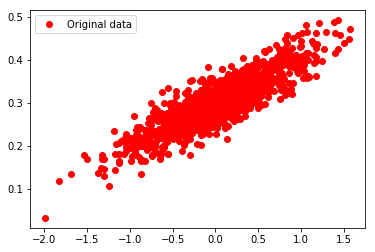

In [10]:
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'ro', label='Original data')
plt.legend()
plt.show()

In [11]:
w = tf.Variable(tf.random_uniform([1],-0.1,0.1))
b = tf.Variable(tf.zeros([1]))
y = w*x_data +b

In [12]:
loss = tf.reduce_mean(tf.square(y-y_data))

In [13]:
optimizer=tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

알고리즘 실행

In [14]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [15]:
for step in range(8):
    sess.run(train)
    print(step, sess.run(w), sess.run(b))

0 [0.01181633] [0.30113748]
1 [0.03913653] [0.3009303]
2 [0.05807792] [0.30079412]
3 [0.07121016] [0.3006997]
4 [0.08031486] [0.30063426]
5 [0.08662723] [0.30058888]
6 [0.09100366] [0.3005574]
7 [0.09403787] [0.3005356]


No handles with labels found to put in legend.


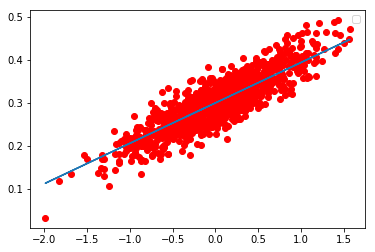

In [16]:
plt.plot(x_data,y_data,'ro')
plt.plot(x_data,sess.run(w)*x_data+sess.run(b))
plt.legend()
plt.show()